# LBP GREYSCALE

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
def compute_lbp(img):
    # Menggunakan algoritma LBP untuk mengekstraksi fitur LBP
    lbp = local_binary_pattern(img, P=8, R=1)
    # diisi 8 karena 8 bit citranya 9-1
    return lbp

def compute_lbph(image):
    # Hitung fitur LBP
    lbp_image = compute_lbp(image).astype(np.uint8)
    # Hitung histogram nilai-nilai LBP
    lbph = cv2.calcHist([lbp_image], [0], None, [256], [0, 256])
    lbph = lbph.astype(np.int64)
    # Normalisasi histogram kalo mau dinormalisasi
    # lbph /= np.sum(lbph) = code normalisasi
    return lbph.flatten()

# Baca citra
filenya_rgb = "RGB1.jpeg"
filenya = "BUNGA1.jpeg"
image = cv2.imread(filenya)
print(image.shape)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #yang dikirim harus 1 dimensi gabisa langsung 3
print(gray.shape)
rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# dikonversi 
# kalo 2 angka koma/koma 1 berati grayscale , kalo 3 rgb

# Hitung LBPH
lbp_features = compute_lbp(gray)
lbph_features = compute_lbph(gray)

(275, 183, 3)
(275, 183)


P (Jumlah Titik Tetangga): Parameter P menentukan jumlah titik tetangga yang akan digunakan untuk membandingkan nilai piksel pusat. Dalam kasus ini, P=8 berarti akan ada 8 titik tetangga yang digunakan (8 bit) untuk menghitung LBP. Titik-titik tetangga ini biasanya diposisikan secara seragam di sekitar piksel pusat, membentuk lingkaran. <br>

R (Radius): Parameter R menentukan radius lingkaran yang mengelilingi piksel pusat di mana titik-titik tetangga berada. R=1 berarti titik-titik tetangga berada pada jarak 1 piksel dari piksel pusat

selengkapnya cek : [link](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.local_binary_pattern)

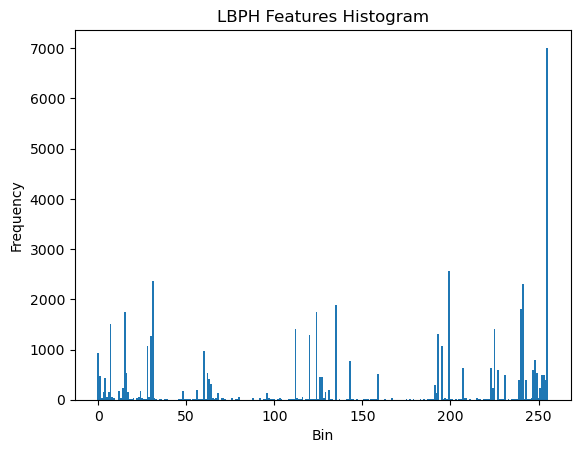

In [23]:
# Tampilkan histogram fitur LBPH dalam bentuk grafik
plt.bar(range(len(lbph_features)), lbph_features, width=1.0)
plt.title('LBPH Features Histogram')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.show()

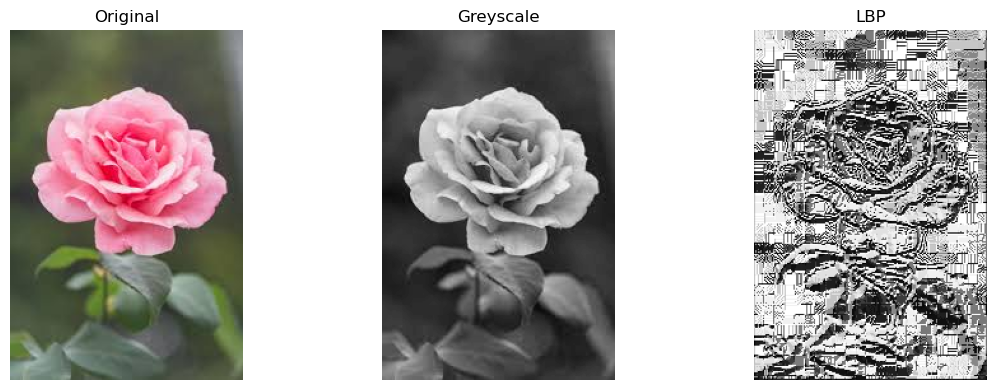

In [24]:
# Membuat figure
plt.figure(figsize=(12, 4))  # Ukuran figure

# Menampilkan gambar pada subplot
plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, subplot ke-1
plt.imshow(rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, subplot ke-2
plt.imshow(gray, cmap='gray')
plt.title('Greyscale')
plt.axis('off')

plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, subplot ke-3
plt.imshow(lbp_features, cmap='gray')
plt.title('LBP')
plt.axis('off')

plt.tight_layout()  # Menyesuaikan tata letak
plt.show()

<h2>LBP Standard</h2>
<img src="https://www.researchgate.net/publication/221265249/figure/fig4/AS:668488939077644@1536391591535/Calculation-of-Local-Binary-pattern.ppm">

# LBPH

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*-cyqWPcas3CXp4O2O7xPpg.png">

# LBPH GREYSCALE

In [25]:
import pandas as pd

lbph_features_pd = lbph_features.reshape(1, -1)  # -1 akan otomatis menghitung jumlah kolom yang dibutuhkan

# Buat DataFrame Pandas
df_features = pd.DataFrame(lbph_features_pd, columns=[f'x{i+1}' for i in range(lbph_features_pd.shape[1])])

df_features

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256
0,929,473,35,154,424,47,156,1506,46,29,...,26,584,783,534,34,230,484,494,400,7011


# LBP RGB

(275, 183, 3)


C:\Users\ASUS\anaconda3\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


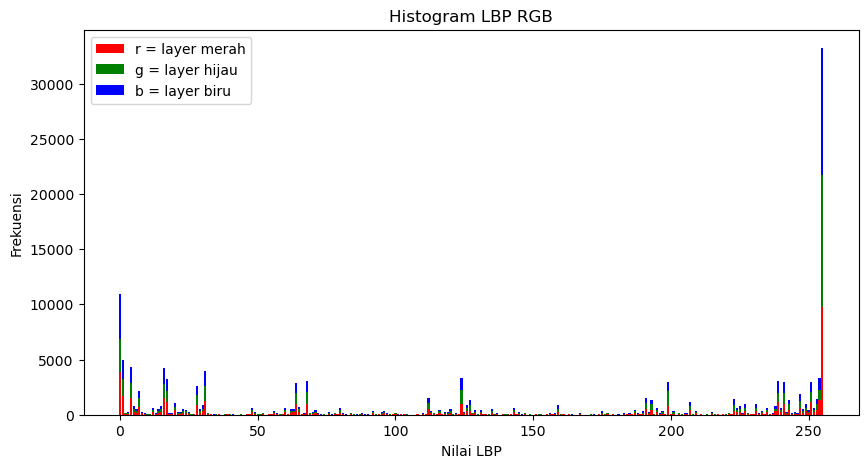

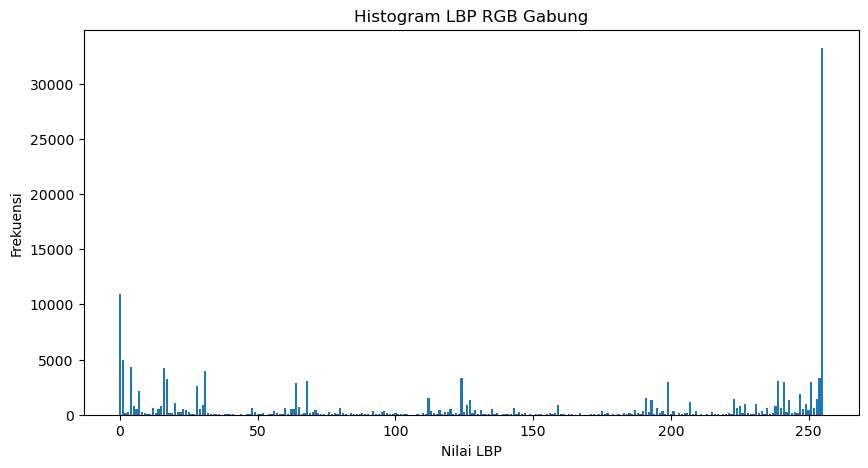

In [26]:
# Baca citra
image = cv2.imread(filenya_rgb)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(rgb.shape)
# citra rgb punya 3 channel
lbp_red = compute_lbp(image[:, :, 0])
lbp_green = compute_lbp(image[:, :, 1])
lbp_blue = compute_lbp(image[:, :, 2])

# Gabungkan gambar LBP menjadi satu gambar RGB
lbp_rgb = cv2.merge((lbp_red, lbp_green, lbp_blue)).astype(np.uint8)



# Hitung LBPH
lbph_features_red = compute_lbph(lbp_red)
lbph_features_green = compute_lbph(lbp_green)
lbph_features_blue = compute_lbph(lbp_blue)

lbph_rgb = lbph_features_red + lbph_features_green + lbph_features_blue

# Tampilkan histogram LBP dalam RGB
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lbph_features_red)), lbph_features_red, color='r', label='r = layer merah')
plt.bar(np.arange(len(lbph_features_green)), lbph_features_green, color='g', label='g = layer hijau', bottom=lbph_features_red)
plt.bar(np.arange(len(lbph_features_blue)), lbph_features_blue, color='b', label='b = layer biru', bottom=lbph_features_red + lbph_features_green)

plt.title('Histogram LBP RGB')
plt.xlabel('Nilai LBP')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


# Tampilkan histogram LBP dalam RGB concate (Perbaikan)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lbph_rgb)), lbph_rgb)
plt.title('Histogram LBP RGB Gabung')
plt.xlabel('Nilai LBP')
plt.ylabel('Frekuensi')
plt.show()

In [27]:
lbph_features_red[0], lbph_features_green[0], lbph_features_blue[0]

(3839, 3045, 4094)

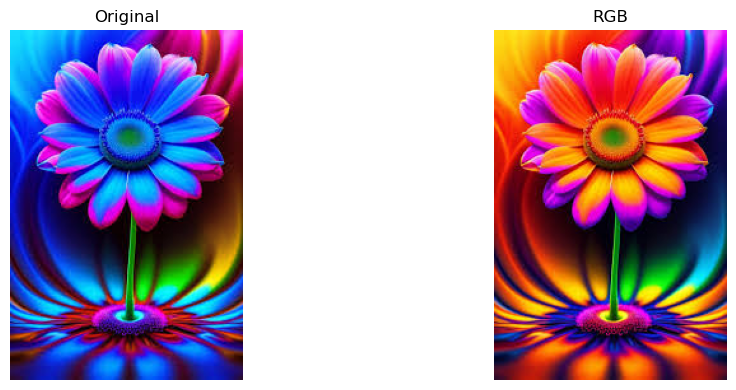

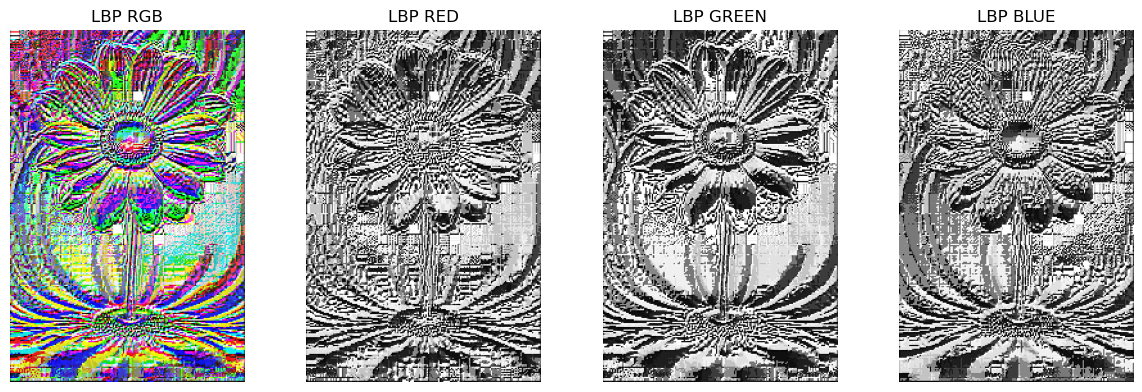

In [28]:
import matplotlib.pyplot as plt


# Membuat figure
plt.figure(figsize=(12, 4))  # Ukuran figure

# Menampilkan gambar pada subplot
plt.subplot(1, 2, 1)  # 1 baris, 3 kolom, subplot ke-1
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)  # 1 baris, 3 kolom, subplot ke-2
plt.imshow(rgb)
plt.title('RGB')
plt.axis('off')


plt.tight_layout()  # Menyesuaikan tata letak
plt.show()




# Membuat figure
plt.figure(figsize=(12, 4))  # Ukuran figure

# Menampilkan gambar pada subplot
plt.subplot(1, 4, 1)  # 1 baris, 3 kolom, subplot ke-1
plt.imshow(cv2.cvtColor(lbp_rgb, cv2.COLOR_BGR2RGB))
plt.title('LBP RGB')
plt.axis('off')

plt.subplot(1, 4, 2)  # 1 baris, 3 kolom, subplot ke-2
plt.imshow(lbp_red, cmap="grey")
plt.title('LBP RED')
plt.axis('off')


# Menampilkan gambar pada subplot
plt.subplot(1, 4, 3)  # 1 baris, 3 kolom, subplot ke-1
plt.imshow(lbp_green, cmap="grey")
plt.title('LBP GREEN')
plt.axis('off')

plt.subplot(1, 4, 4)  # 1 baris, 3 kolom, subplot ke-2
plt.imshow(lbp_blue, cmap="grey")
plt.title('LBP BLUE')
plt.axis('off')

plt.tight_layout()  # Menyesuaikan tata letak
plt.show()



# LBPH RGB

In [29]:
import pandas as pd

lbph_features_pd = lbph_rgb.reshape(1, -1)  # -1 akan otomatis menghitung jumlah kolom yang dibutuhkan

# Buat DataFrame Pandas
df_features = pd.DataFrame(lbph_features_pd, columns=[f'x{i+1}' for i in range(lbph_features_pd.shape[1])])

df_features


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256
0,10978,4931,182,257,4335,770,527,2146,277,148,...,154,1859,543,962,383,2976,635,1434,3340,33215
